### ALBUMENTATION

### Example

In [1]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [2]:
new_path_img = '/home/manhduy/Documents/model_DL/envData_Augmentation/Imgaug_albumentation/images/image_2.jpg'

In [5]:
img = cv2.imread(new_path_img)[:,:,::-1]
# show_img(image)

In [6]:
img1 = np.asarray(img, dtype=np.uint16)

In [7]:
img1.dtype

dtype('uint16')

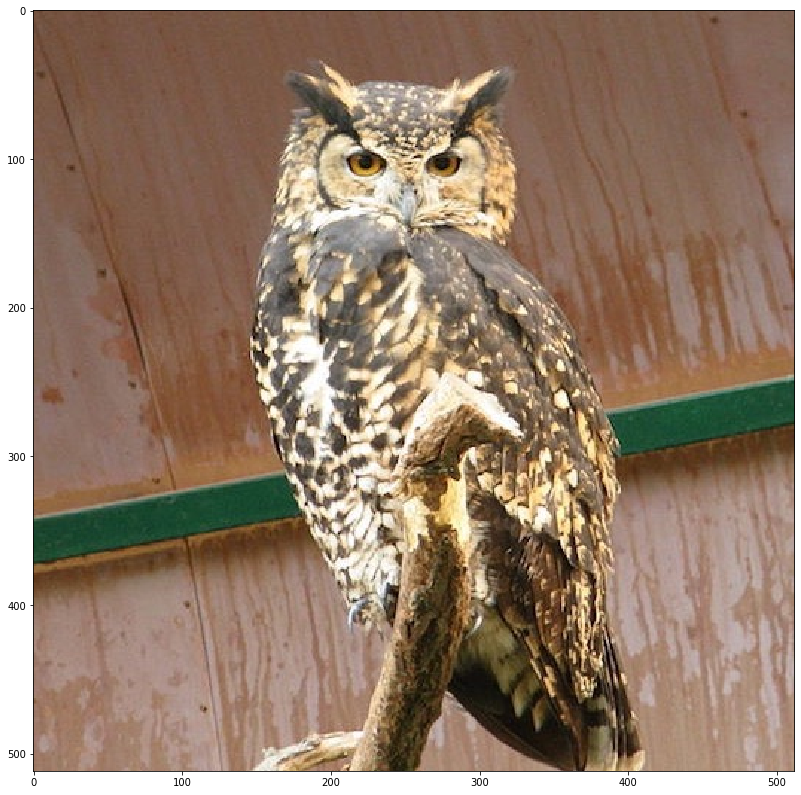

In [8]:
plt.figure(figsize=(14, 14))

# Divide all values by 65535 so we can display the image using matplotlib
plt.imshow(img1/255 )

In [9]:
def strong_tiff_aug(p=.5):
    return Compose([
        # albumentations supports uint8 and float32 inputs. For the latter, all
        # values must lie in the range [0.0, 1.0]. To apply augmentations, we
        # first use a `ToFloat()` transformation, which will inspect the data
        # type of the input image and convert the image to a float32 ndarray where
        # all values lie in the required range [0.0, 1.0].
        ToFloat(),
        
        # Alternatively, you can specify the maximum possible value for your input
        # and all values will be divided by it instead of using a predefined value
        # for a specific data type.       
        # ToFloat(max_value=65535.0),
        
        # Then we will apply augmentations
        RandomRotate90(),
        Flip(),
        OneOf([
            MotionBlur(p=0.2),
            MedianBlur(blur_limit=3, p=0.1),
            Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=0.1),
        ], p=0.2),        
        HueSaturationValue(hue_shift_limit=20, sat_shift_limit=0.1, val_shift_limit=0.1, p=0.3),
        
        # You can convert the augmented image back to its original
        # data type by using `FromFloat`.
        # FromFloat(dtype='uint16'),

        # As in `ToFloat` you can specify a `max_value` argument and all input values
        # will be multiplied by it.
        # FromFloat(dtype='uint16', max_value=65535.0),

    ], p=p)

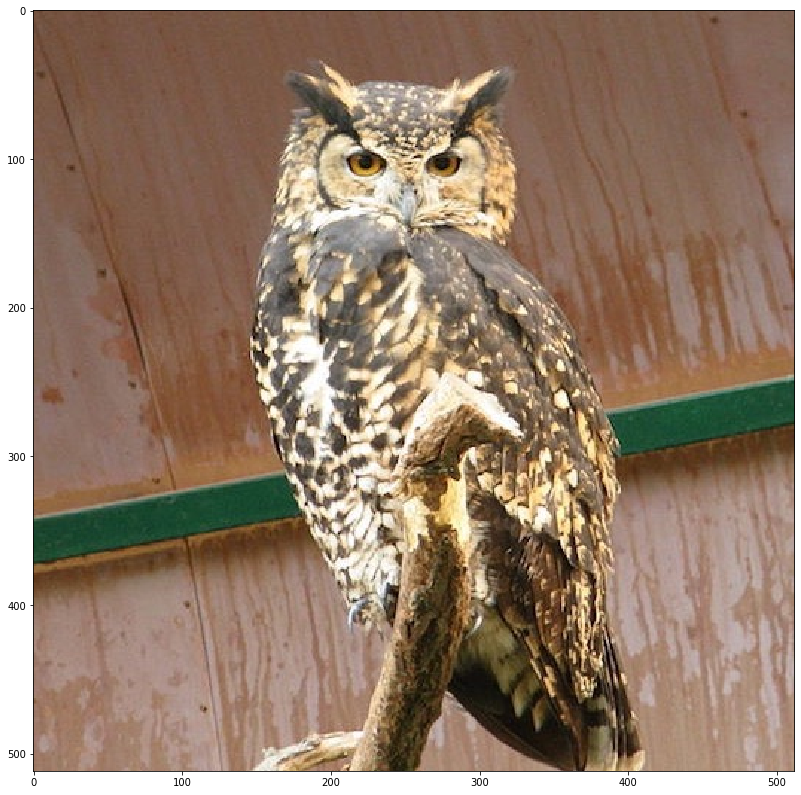

In [10]:
from albumentations import (
    Compose, ToFloat, FromFloat, RandomRotate90, Flip, OneOf, MotionBlur, MedianBlur, Blur,
    ShiftScaleRotate, OpticalDistortion, GridDistortion, RandomBrightnessContrast,
    HueSaturationValue,
)

augmentation = strong_tiff_aug(p=0.9)
augmented = augmentation(image=img)
plt.figure(figsize=(14, 14))
plt.imshow(augmented['image'])

### How to use albumentation for detection tasks  

In [12]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    BboxParams,
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [15]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    # hàm vẽ hình vuông với thichkcess là boder. 
    
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

### For detection tasks you must specify bbox_params with at least format field.
Available formats are: coco, pascal_voc.

The coco format of a bounding box looks like [x_min, y_min, width, height], e.g. [97, 12, 150, 200].

The pascal_voc format of a bounding box looks like [x_min, y_min, x_max, y_max], e.g. [97, 12, 247, 212].

If you have labels in separate fields - don't forget to specify their names

In [16]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [19]:
path_img1 = '/home/manhduy/Documents/model_DL/envData_Augmentation/Imgaug_albumentation/images/image6.jpg'
image = cv2.imread(path_img1)[:,:,::-1]

In [20]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], 
                                          [5.66, 138.95, 147.09, 164.88]], 
                                           'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

### Original image

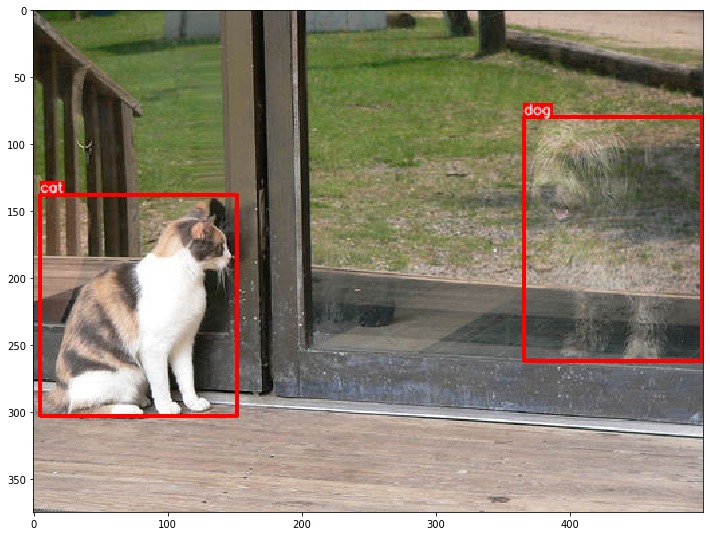

In [21]:
visualize(annotations, category_id_to_name)

In [22]:
Few simple cases

SyntaxError: invalid syntax (<ipython-input-22-9fd30f4ec926>, line 1)

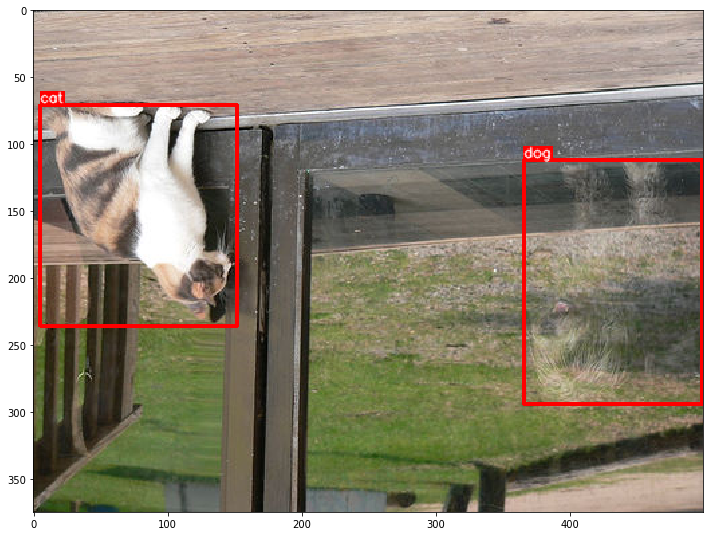

In [23]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

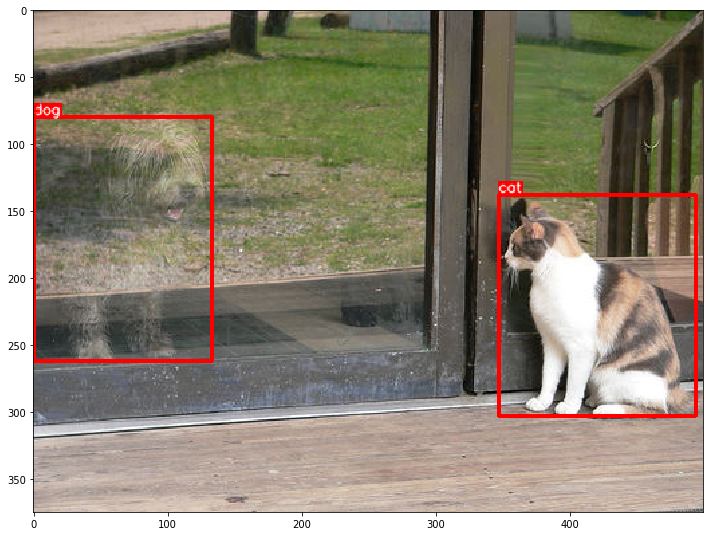

In [24]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

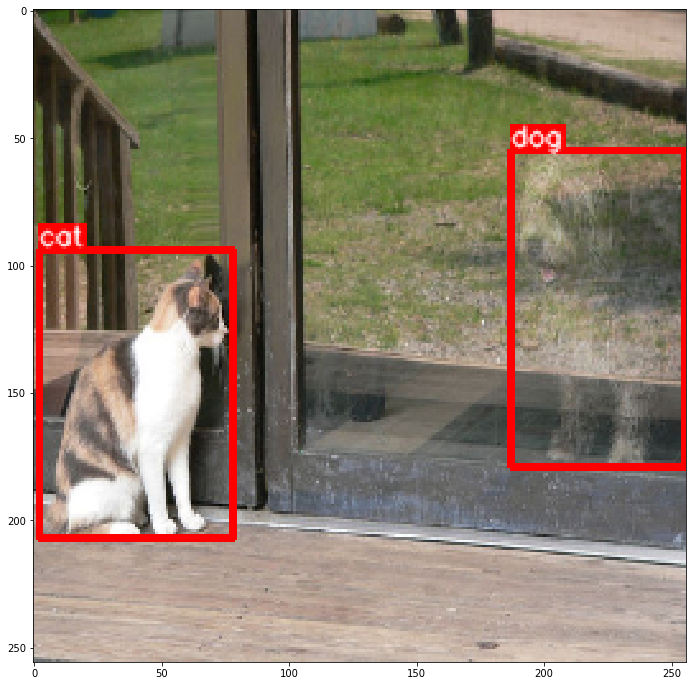

In [25]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### Some transforms could cut boxes or even delete them.
You have two options to control this behavior: min_area and min_visibility

By default min_area and min_visibility are both zeros, so only boxes outside of picture are going to be deleted

### CenterCrop 

In [26]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### CenterCrop with default filter

In [27]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)])
augmented = aug(**annotations)
print(augmented['category_id'])
visualize(augmented, category_id_to_name)

[17]


### CenterCrop + filter with min_area

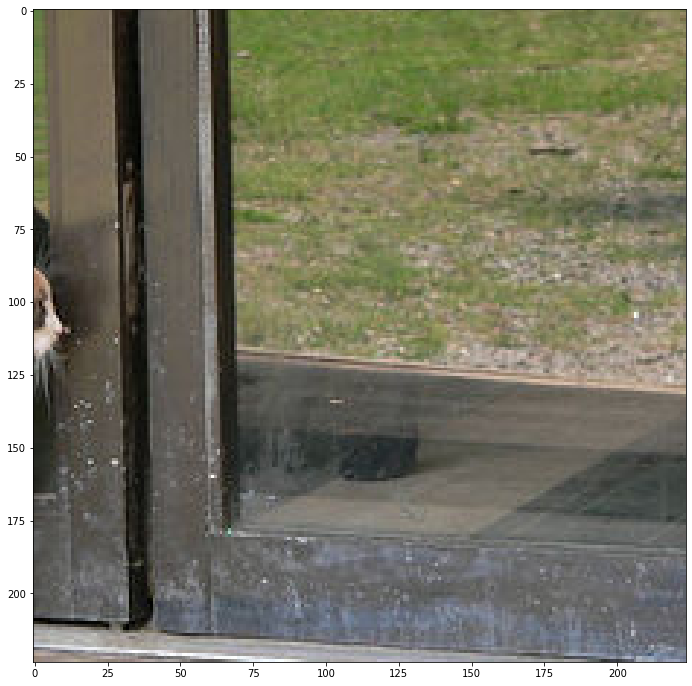

In [28]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)], min_area=4000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### CenterCrop + filter by visibility

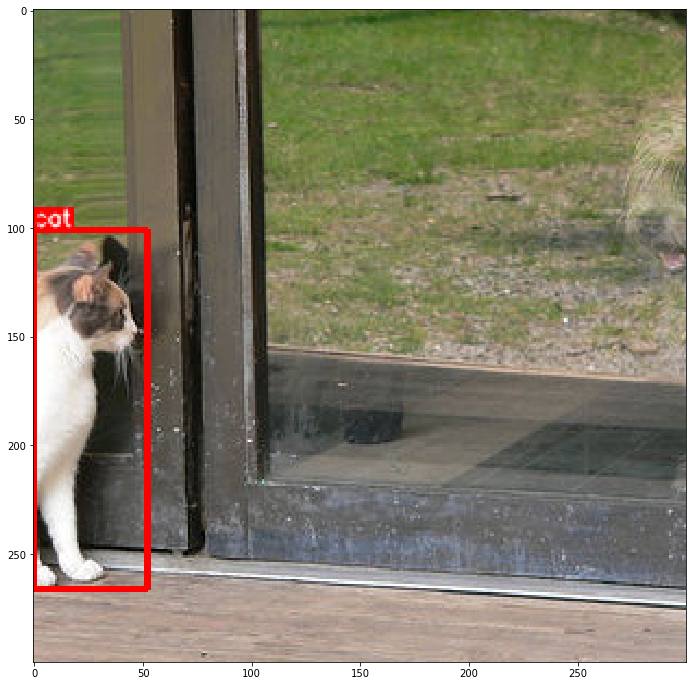

In [29]:

# Compose filters bounding boxes and returns
# only those boxes whose visibility after transformation is above the threshold.
aug = get_aug([CenterCrop(p=1, height=300, width=300)], min_visibility=0.3)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

# Visibility of the transformed bbox for `dog` is about 0.25 (that means that
# the area of the transformed bbox is about 25% of the area of the original bbox),
# so it will be removed
# Visibility of the transformed bbox for `cat` is about 0.36,
# so it will be kept.

### How to use albumentations for detection tasks, if you need to keep all bboxes
While the original example of bounding box shows general augmentation for detection tasks, this is an example when you need all bounding boxes remain on the sample.

In [30]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [31]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [32]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return A.Compose(aug, A.BboxParams(format='coco', min_area=min_area, 
                                       min_visibility=min_visibility, label_fields=['category_id']))

In [33]:
image = cv2.imread(path_img1)[:,:,::-1]

In [34]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

### Original image3

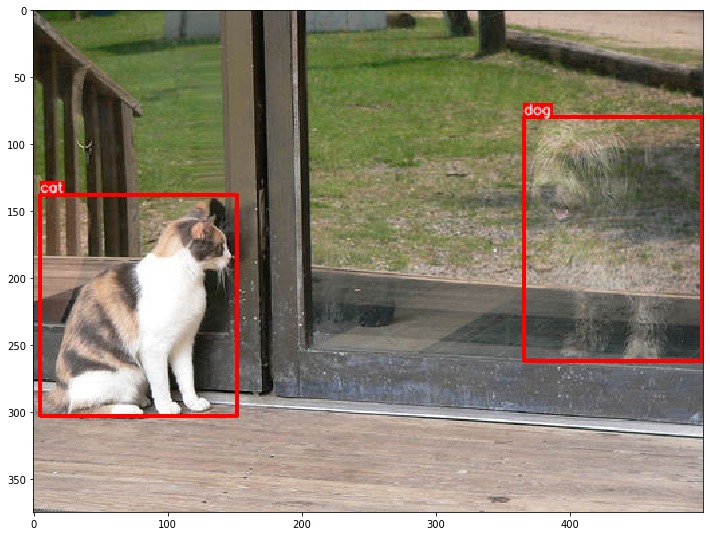

In [35]:
visualize(annotations, category_id_to_name)

### Following are examples which don't drop bounding boxes
A new transformation RandomSizedBBoxSafeCrop does the job.

width, height are size of output image after random sized crop. erosion_rate is a setting to show how much you can lose volume of bboxes. 0.2 shows up to 20% of all bounding box's volume can be lost.

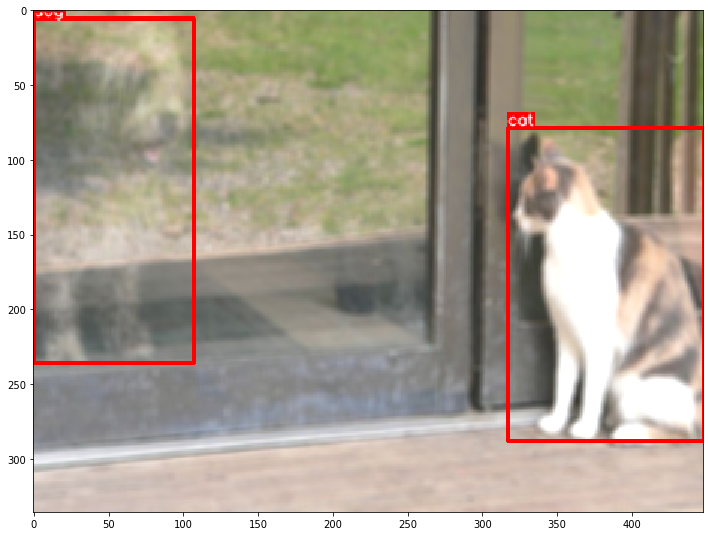

In [36]:
aug = get_aug([
    A.HorizontalFlip(p=0.5),
    A.RandomSizedBBoxSafeCrop(width=448, height=336, erosion_rate=0.2),
    A.RGBShift(p=0.5),
    A.Blur(blur_limit=11, p=0.5),
    A.RandomBrightness(p=0.5),
    A.CLAHE(p=0.5),
])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

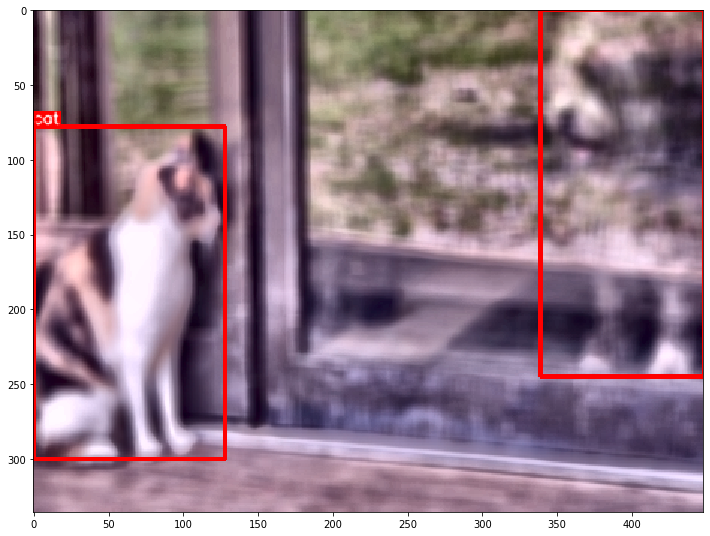

In [37]:
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)